In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black
from pyspark.sql import functions as F, Window
from manga_recsys.spark import get_spark

spark = get_spark()

In [6]:
! ls ../data/processed/2022-12-17-metadata-listing

group_info.json
group_info.parquet
group_manga.json
group_manga.parquet
group_summary.json
group_summary.parquet
manga_info.json
manga_info.parquet


In [10]:
manga_info = spark.read.parquet(
    "../data/processed/2022-12-17-metadata-listing/manga_info.parquet"
)
manga_info.printSchema()
manga_info.show(5, vertical=True, truncate=80)

root
 |-- id: string (nullable = true)
 |-- createdAt: string (nullable = true)
 |-- updatedAt: string (nullable = true)
 |-- availableTranslatedLanguages: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- originalLanguage: string (nullable = true)
 |-- publicationDemographic: string (nullable = true)
 |-- status: string (nullable = true)
 |-- year: long (nullable = true)
 |-- contentRating: string (nullable = true)
 |-- name: string (nullable = true)
 |-- chapter_count: long (nullable = true)
 |-- page_count: long (nullable = true)
 |-- description: string (nullable = true)
 |-- tags: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- group: string (nullable = true)
 |    |    |-- name: string (nullable = true)

-RECORD 0--------------------------------------------------------------------------------------------------------
 id                           | 005b434a-f5ba-49cc-8a97-549ae4a386c6                                

In [12]:
import matplotlib.pyplot as plt

df = manga_info.select("chapter_count", "page_count").toPandas()
df.describe()

,chapter_count,page_count
count,40321.000000,40321.000000
mean,16.832792,394.528856
std,40.712279,853.380381
min,1.000000,0.000000
25%,1.000000,38.000000
50%,6.000000,158.000000
75%,16.000000,386.000000
max,2460.000000,35255.000000


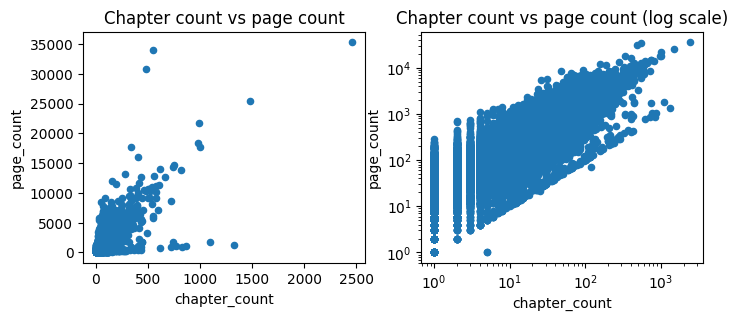

In [37]:
# create a 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

df.plot.scatter(x="chapter_count", y="page_count", ax=ax1)
ax1.set_title("Chapter count vs page count")

# same as above, but with a log scale
df.plot.scatter(x="chapter_count", y="page_count", ax=ax2)
ax2.set_title("Chapter count vs page count (log scale)")
ax2.set_yscale("log")
ax2.set_xscale("log")
plt.show()

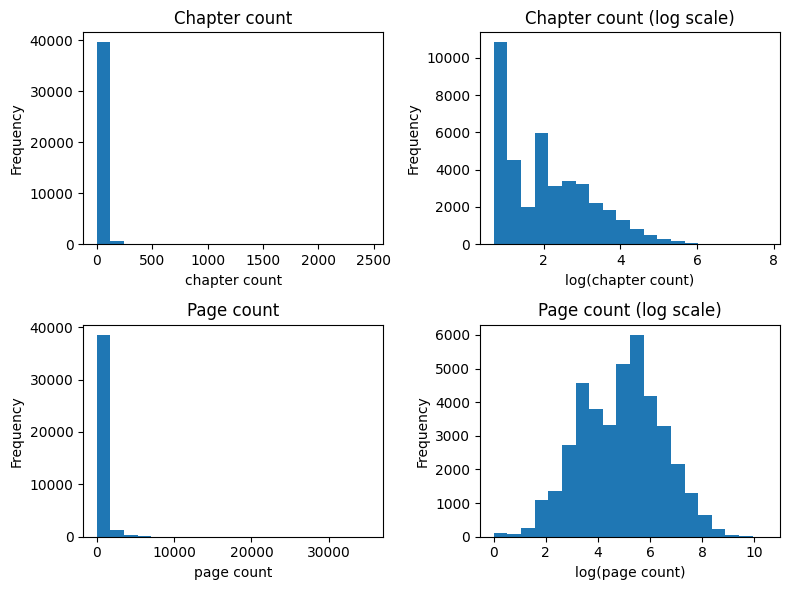

In [46]:
import numpy as np

# create a 2x2 subplot, first row is for chapter counts, second row is for page counts
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

ax1, ax2, ax3, ax4 = axes.flatten()

# now plot chapter counts in a histogram
df["chapter_count"].plot.hist(ax=ax1, bins=20)
ax1.set_title("Chapter count")
ax1.set_xlabel("chapter count")

# same as above, but with a log scale
df["chapter_count"].apply(lambda x: np.log(x + 1)).plot.hist(ax=ax2, bins=20)
ax2.set_title("Chapter count (log scale)")
ax2.set_xlabel("log(chapter count)")

# now plot page counts in a histogram
df["page_count"].plot.hist(ax=ax3, bins=20)
ax3.set_title("Page count")
ax3.set_xlabel("page count")

# same as above, but with a log scale
df["page_count"].apply(lambda x: np.log(x + 1)).plot.hist(ax=ax4, bins=20)
ax4.set_title("Page count (log scale)")
ax4.set_xlabel("log(page count)")

plt.tight_layout()
plt.show()